# Исследование объявлений о продаже квартир <a class="tocSkip">

### Вводная:<a class="tocSkip">

  Онлайн сервис по продаже недвижимости "Топаз" хочет построить систему для отслеживания аномалий и мошеннической деятельности при продаже квартир. 

  Вам предоставлен архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Для каждого объявления доступны два вида данных: заполненные пользователем и полученные автоматически на основе картографических данных. (Например, расстояние до центра, аэропорта, ближайшего парка и водоёма) 

### Цель <a class="tocSkip">
    
Установить параметры, характерные для рыночной стоимости объектов недвижимости. Определить, какие факторы больше всего влияют на стоимость квартиры.

### План проекта: <a class="tocSkip">

[1. Открыть файл с данными и изучить общую информацию](#step1)  
[2. Предобработка данных](#step2)
    - определить и изучить пропущенные значения;
    - привести данные к нужным типам.
[3. Посчитать и добавить в таблицу:](#step3)
    - цену квадратного метра;
    - день недели, месяц и год публикации объявления;
    - этаж квартиры; варианты — первый, последний, другой;
    - соотношение жилой и общей площади, а также отношение площади кухни к общей.
[4. Провести исследовательский анализ данных:](#step4)
    - Изучить следующие параметры: площадь, цена, число комнат, высота потолков.
    - Изучить время продажи квартиры. 
    - Убрать редкие и выбивающиеся значения. 
    - Определить, какие факторы больше всего влияют на стоимость квартиры.
    - Выбрать 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. 
    - Изучить предложения квартир в центре Санкт-Петербурга.
    - Сравнить выводы по центру Санкт-Петербурга с общими выводами по всему городу.
[5. Общий вывод](#step5)

#### Описание данных <a class="tocSkip">
<p align=left>

| Признак | Описание |
:---|:---
airports_nearest | расстояние до ближайшего аэропорта в метрах (м)
balcony | число балконов
ceiling_height | высота потолков (м)
cityCenters_nearest | расстояние до центра города (м)
days_exposition | сколько дней было размещено объявление (от публикации до снятия)
first_day_exposition | дата публикации
floor | этаж
floors_total | всего этажей в доме
is_apartment | апартаменты (булев тип)
kitchen_area | площадь кухни в квадратных метрах (м²)
last_price | цена на момент снятия с публикации
living_area | жилая площадь в квадратных метрах(м²)
locality_name | название населённого пункта
open_plan | свободная планировка (булев тип)
parks_around3000 | число парков в радиусе 3 км
parks_nearest | расстояние до ближайшего парка (м)
ponds_around3000 | число водоёмов в радиусе 3 км
ponds_nearest | расстояние до ближайшего водоёма (м)
rooms | число комнат
studio | квартира-студия (булев тип)
total_area | площадь квартиры в квадратных метрах (м²)
total_images | число фотографий квартиры в объявлении
    
</p>

### 0. Установка библиотек

In [ ]:
%pip install dill
import dill
import pandas as pd
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
import seaborn as sns

### Шаг 1. Открытие файла с данными и изучение общей информации.  <a id='step1'></a>

In [1]:
#прочтем датафрейм, указав разделитель '\t'
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

#включим отображение всех столбцов
pd.set_option('display.max_columns', None)

data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [3]:
#для наглядности установим отображение 1 знака после запятой
pd.set_option('precision', 1)

data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.0,2.4e+04,23699.0,23699.0,14504.0,23613.0,21796.0,23699.0,21421.0,12180.0,18157.0,18180.0,18181.0,8079.0,18181.0,9110.0,20518.0
mean,9.9,6.5e+06,60.3,2.1,2.8,10.7,34.5,5.9,10.6,1.2,28793.7,14191.3,0.6,490.8,0.8,518.0,180.9
std,5.7,1.1e+07,35.7,1.1,1.3,6.6,22.0,4.9,5.9,1.1,12630.9,8608.4,0.8,342.3,0.9,277.7,219.7
min,0.0,1.2e+04,12.0,0.0,1.0,1.0,2.0,1.0,1.3,0.0,0.0,181.0,0.0,1.0,0.0,13.0,1.0
25%,6.0,3.4e+06,40.0,1.0,2.5,5.0,18.6,2.0,7.0,0.0,18585.0,9238.0,0.0,288.0,0.0,294.0,45.0
50%,9.0,4.6e+06,52.0,2.0,2.6,9.0,30.0,4.0,9.1,1.0,26726.0,13098.5,0.0,455.0,1.0,502.0,95.0
75%,14.0,6.8e+06,69.9,3.0,2.8,16.0,42.3,8.0,12.0,2.0,37273.0,16293.0,1.0,612.0,1.0,729.0,232.0
max,50.0,7.6e+08,900.0,19.0,100.0,60.0,409.7,33.0,112.0,5.0,84869.0,65968.0,3.0,3190.0,3.0,1344.0,1580.0


### Вывод

После получения данных мы имеем информацию о 23699 объявлениях с 22 возможными признаками. Названия столбцов (признаков) соответствуют документации.
Первичный взгляд на данные позволяет выявить следующие проблемы:
1. Признак `first_day_exposition` (дата публикации) имеет тип object, его необходимо заменить на формат datetime.
2. `is_apartment` (апартаменты) имеет тип object, хотя должен иметь булев тип данных.
3. В данных большое количство пропущенных значений (в 15 столбцах), их можно обработать.       
4. В столбце `ceiling_height` (высота потолка) есть аномально большие (100м) значения. 
5. Также необходимо обратить на странный разброс `living_area` (жил. площадь) - 2м минимальная и 409м максимальная площадь.
6. В значениях `kitchen_area` (площадь кухни) минимальная площадь 1.3м - 
7. `airports_nearest` минимальное значение 0 метров - что это означает? Здание на территории аэропорта? или человек имелл ввиду что их нет рядом?

Попробуем решить эти задачи – перейдем к предобработке данных.

### Шаг 2. Предобработка данных

#### 2.1. Обработка пропусков

In [4]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [5]:
#соберем всю статистику в одну функцию
def stats_for_missing(column_name):
    print(missing_values(column_name))
    print()
    print(data.corr().loc[column_name].sort_values(ascending= False))
    

#создадим фунцию, подсчитывающую процент пропусков
def missing_values(column_name):
    return 'Доля пропущеных значений: {:.1%}'.format(data[column_name].isna().sum() / len(data[column_name]))

##### 2.1.1. Высота потолков
Начнем по порядку - с высоты потолков. 

In [6]:
missing_values('ceiling_height')

'Доля пропущеных значений: 38.8%'

Доля довольно велика, поэтому оценим как эти значения восстановить:<a id='ceiling0'></a>

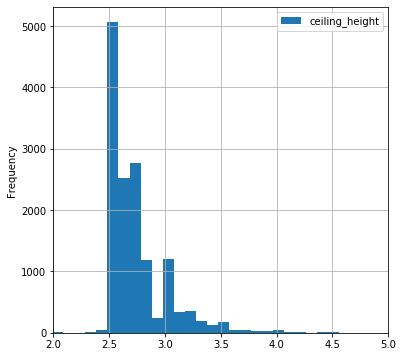

In [7]:
data.plot(y = 'ceiling_height', 
          kind= 'hist',
          xlim= (2, 5),
          bins= 1000,
          figsize=(6, 6),
          grid= True)

In [8]:
pd.set_option('precision', 4)

data.corr().ceiling_height

total_images          -0.0020
last_price             0.0854
total_area             0.0955
rooms                  0.0545
ceiling_height         1.0000
floors_total          -0.0287
living_area            0.0906
floor                 -0.0118
studio                 0.0017
open_plan              0.0428
kitchen_area           0.0876
balcony                0.0405
airports_nearest      -0.0239
cityCenters_nearest   -0.0917
parks_around3000       0.0659
parks_nearest         -0.0192
ponds_around3000       0.0782
ponds_nearest         -0.0591
days_exposition        0.0191
Name: ceiling_height, dtype: float64

Значимой связи высоты потолков с другими переменными не выявлено, поэтому будем заполнять пропуски на основе самой переменной – основная часть значений лежит около медианы, поэтому мы можем использовать для заполнения медианное значение.

In [9]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['ceiling_height'].isna().sum()

0

Возможной $причиной$ возникновения пропусков является простое незнание высоты потолков людьми, выставляющими квартиру на продажу.

##### 2.1.2. Количество этажей в доме

In [10]:
missing_values('floors_total')

'Доля пропущеных значений: 0.4%'

In [11]:
data[data['floors_total'].isna() == True].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,1.1640e+07,65.2,2018-10-02T00:00:00,2,2.65,NaN,30.80,4,NaN,False,False,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2.4380e+06,28.1,2016-11-23T00:00:00,1,2.65,NaN,20.75,1,NaN,False,False,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9.7883e+06,70.8,2015-08-01T00:00:00,2,2.65,NaN,38.40,12,NaN,False,False,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6.0512e+06,93.6,2017-04-06T00:00:00,3,2.65,NaN,47.10,8,NaN,False,False,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3.6000e+06,39.0,2017-04-22T00:00:00,1,2.65,NaN,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0


In [12]:
data.corr().floors_total.sort_values(ascending= False)

floors_total           1.0000
floor                  0.6781
balcony                0.1941
kitchen_area           0.1639
airports_nearest       0.1083
parks_nearest          0.0975
studio                 0.0702
open_plan              0.0508
ponds_nearest          0.0389
cityCenters_nearest    0.0198
total_images           0.0104
last_price            -0.0070
ceiling_height        -0.0268
days_exposition       -0.0522
total_area            -0.0758
ponds_around3000      -0.1227
living_area           -0.1693
rooms                 -0.2282
parks_around3000      -0.2528
Name: floors_total, dtype: float64

Видим что корелляция проявляется в основном только с этажом квартиры.

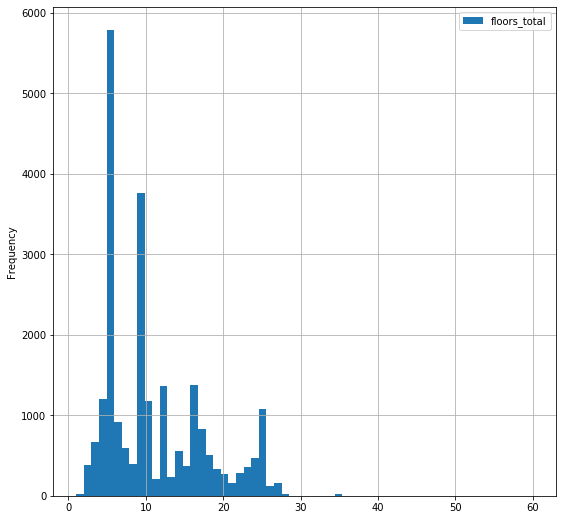

In [13]:
data.plot(y = 'floors_total', 
          figsize=(9, 9),
          kind= 'hist',
          bins= 60,
          grid= True)

Из-за особенностей архитектуры города мы видим неравномерное распределение - очень много пяти- и девяти- этажек. Также мы знаем что в доме не может быть меньше этажей чем номер этажа на котором находится квартира.

Поэтому используем следующую логику заполнения: если квартира на 1 - 5 этаже - предположим что это пятиэтажка, если на 6 - 9, то это девятиэтажное здание; 10 - 12, 12 этажей; 13 - 16, 16 этажей; 17 - 25, 25 этажей. 

Так как доля пропущенных значений мала, то сдвиг к превалирующим значениям не должен сильно повлиять на дальнейший анализ.

Одной из задач исследования является анализ стоимости квартиры в зависимости от того, последний это этаж или нет. Для того, чтобы сильно не влиять на эту статистику (скорее всего доля квартир на последнем этаже гораздо меньше чем доля остальных) для остальных квартир укажем что это предпоследний этаж. 

In [14]:
def calculate_floors_total(row):
    if row['floors_total'] != row['floors_total']:
        if row['floor'] <= 5:
            return 5
        if row['floor'] <= 9:
            return 9
        if row['floor'] <= 12:
            return 12
        if row['floor'] <= 16:
            return 16
        else:
            return row['floor'] + 1
        
    else:
        return row['floors_total']
    
data['floors_total'] = data.apply(calculate_floors_total, axis=1)
# восстанавливаем значения и проверяем что все заполнилось
data['floors_total'].isna().sum()

0

##### 2.1.3. Жилая площадь

In [15]:
stats_for_missing('living_area')         

Доля пропущеных значений: 8.0%

living_area            1.0000
total_area             0.9395
rooms                  0.8460
last_price             0.5665
kitchen_area           0.4287
parks_around3000       0.1845
ponds_around3000       0.1489
days_exposition        0.1425
total_images           0.1048
ceiling_height         0.0786
balcony                0.0188
open_plan             -0.0337
parks_nearest         -0.0502
studio                -0.0562
airports_nearest      -0.0579
ponds_nearest         -0.0817
floor                 -0.0972
floors_total          -0.1693
cityCenters_nearest   -0.2314
Name: living_area, dtype: float64


Видим что доля пропусков 8%. Так как нам предстоит посчитать соотношение жилой и общей площади, постараемся восстановить пропущенные значения как можно точнее. Для этого построим модель линейной регрессии по факторам, имеющим сильную корреляцию с жил. площадью - `total_area` и `rooms`.

In [16]:
filled_data = data[data['living_area'] == data['living_area']]

In [87]:
data['living_area'] == data['living_area']

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,m2_price,exposition_weekday,exposition_month,exposition_year,floor_category,living_to_total,kitchen_to_total
0,20,13000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0000,8,False,False,False,25.00,0.0,Санкт-Петербург,18863.0,16.0,1.0,482.0,2.0,755.0,open,120370.3704,3,3,2019,another,0.4722,0.2315
1,7,3350.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.6000,1,False,False,False,11.00,2.0,посёлок Шушары,12817.0,19.0,0.0,NaN,0.0,NaN,81,82920.7921,1,12,2018,first,0.4604,0.2723
2,10,5196.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.3000,4,False,False,False,8.30,0.0,Санкт-Петербург,21741.0,14.0,1.0,90.0,2.0,574.0,558,92785.7143,3,8,2015,another,0.6125,0.1482
4,2,10000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0000,13,False,False,False,41.00,0.0,Санкт-Петербург,31856.0,8.0,2.0,112.0,1.0,48.0,121,100000.0000,1,6,2018,another,0.3200,0.4100
5,10,2890.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.4000,5,False,False,False,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55,95065.7895,0,9,2018,another,0.4737,0.2993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3000,3,False,False,False,13.83,0.0,Санкт-Петербург,24665.0,4.0,1.0,796.0,3.0,381.0,open,72490.8452,1,3,2017,another,0.5478,0.1034
23695,14,3100.0,59.00,2018-01-15T00:00:00,3,2.65,5.0,38.0000,4,False,False,False,8.50,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45,52542.3729,0,1,2018,another,0.6441,0.1441
23696,18,2500.0,56.70,2018-02-11T00:00:00,2,2.65,3.0,29.7000,1,False,False,False,27.00,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,open,44091.7108,6,2,2018,first,0.5238,0.4762
23697,13,11475.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,41.5553,12,False,False,False,23.30,2.0,Санкт-Петербург,39140.0,10.0,2.0,173.0,3.0,196.0,602,149511.4007,1,3,2017,another,0.5414,0.3036


In [86]:
filled_data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,1.3000e+07,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3.3500e+06,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5.1960e+06,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
4,2,1.0000e+07,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2.8900e+06,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.4,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23693,9,4.6000e+06,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.0,8,NaN,False,False,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23694,9,9.7000e+06,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3.1000e+06,59.00,2018-01-15T00:00:00,3,2.65,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2.5000e+06,56.70,2018-02-11T00:00:00,2,2.65,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Посмотрим на то как связана жил. площадь с общей и количеством комнат:

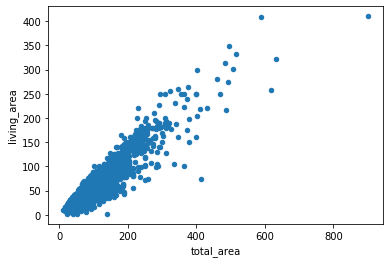

In [17]:
filled_data.plot(x='total_area', y='living_area', kind='scatter')

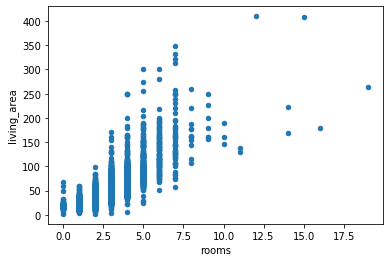

In [18]:
filled_data.plot(x='rooms', y='living_area', kind='scatter')

In [19]:
#обозначим оси для нашей модели
x = filled_data.loc[:, ['total_area', 'rooms']]
y = filled_data.loc[:, 'living_area']
# x1 = filled_data.loc[:, 'total_area']
# x2 = filled_data.loc[:, 'rooms']

In [20]:
# создаем пустую модель
skm = lm.LinearRegression()
# запускаем расчет параметров для указанных данных
skm.fit(x, y)
# и выведем параметры рассчитанной модели
print(skm.intercept_, skm.coef_)

-5.171049938749874 [0.45066677 6.05648783]


Мы получили уравнение
    `living_area = -5.171 + 0.451 * total_area + 6.056 * rooms`

Теперь можем заполнить наши пропущенные данные:

In [21]:
def calculate_living_area(row):
    # проверяем что значение NaN    
    if row['living_area'] != row['living_area']:
        calc_area = (-5.171 + 0.451 * row['total_area'] + 6.056 * row['rooms'])
        return calc_area
    else:
        return row['living_area']
    

data['living_area'] = data.apply(calculate_living_area, axis=1)

data[data['living_area'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Пропущенные значения скорее всего опять возникают из-за того, что владельцы просто не знают значений жилой площади.

##### 2.1.4. Апартаменты

Перейдем к столбцу `is_apartment`

In [22]:
missing_values('is_apartment')

'Доля пропущеных значений: 88.3%'

In [23]:
data.groupby('is_apartment').count()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
is_apartment,,,,,,,,,,,,,,,,,,,,,
False,2725,2725,2725,2725,2725,2725,2725,2725,2725,2725,2725,2550,2267,2710,2103,2104,2104,928,2104,1046,2462
True,50,50,50,50,50,50,50,50,50,50,50,35,31,50,41,43,43,19,43,30,38


Природа пропущенных значений до конца не ясна. Cкорее всего этот пункт – "радио" кнопка на сайте, и нажать её не должно быть сложно. Однако мы видим что доля пропущенных значений целых 88.3 процентов. 
Либо люди сомневаются в значении слова "аппартаменты" и не выбирают ничего, 
либо есть проблемы в дизайне сайта и люди просто не видят эту кнопку - это необходимо проверить.

Пока мы будем считать что кнопку видно и люди просто не знают что это за тип жилья. А раз не знают, то, скорее всего у них обычная квартира. Поэтому будем заменять пропущенные значения на `False`.

In [24]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'].isna().sum()

0

##### 2.1.5.  Площадь кухни

In [25]:
stats_for_missing('kitchen_area')

Доля пропущеных значений: 9.6%

kitchen_area           1.0000
total_area             0.6091
last_price             0.5199
living_area            0.4346
rooms                  0.2699
floors_total           0.1636
ponds_around3000       0.1501
floor                  0.1355
total_images           0.1048
days_exposition        0.1006
balcony                0.0986
parks_around3000       0.0875
ceiling_height         0.0714
is_apartment           0.0490
parks_nearest          0.0296
airports_nearest       0.0082
ponds_nearest         -0.1052
cityCenters_nearest   -0.1900
studio                    NaN
open_plan                 NaN
Name: kitchen_area, dtype: float64


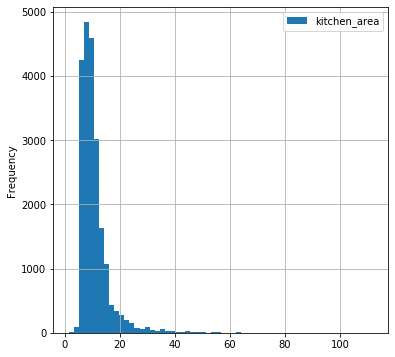

In [26]:
data.plot(y = 'kitchen_area', 
          figsize=(6, 6),
          kind= 'hist',
          bins= 60,
          grid= True)

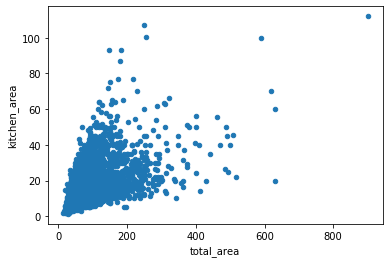

In [27]:
data.plot(x='total_area', y='kitchen_area', kind='scatter')

Видим что разброс уже более широкий по сравнению с `living_area`. Нам кажется что обращаться к линейной регрессии излишне - мы уже посчитали площадь всех жилых помещений и можем использовать её.

Согласно жилищному кодексу общая площадь квартиры – это сумма площадей всех комнат в квартире, в том числе подсобных помещений (сюда относятся кухни), кроме лоджий, балконов, веранд и террас. Для балконов и т.д. используются коеффициенты 0.5 и меньше. Чтобы восстановить данные о площади кухни принебрежем значениями площади балконов (включив её в площадь кухни) и используем формулу

    Площадь кухни = Общая площадь - Жилая площадь. 

In [28]:
def calculate_kitchen_area(row):
    # проверяем что значение NaN    
    if row['kitchen_area'] != row['kitchen_area']:
        calc_area = row['total_area'] - row['living_area']
        return calc_area
    else:
        return row['kitchen_area']
    

data['kitchen_area'] = data.apply(calculate_kitchen_area, axis=1)
data['kitchen_area'].isna().sum()

0

##### 2.1.6. Балконы

In [29]:
stats_for_missing('balcony')

Доля пропущеных значений: 48.6%

balcony                1.0000
floors_total           0.1930
floor                  0.1688
total_images           0.1217
airports_nearest       0.0668
parks_nearest          0.0523
cityCenters_nearest    0.0511
total_area             0.0479
ceiling_height         0.0432
is_apartment           0.0431
studio                 0.0315
last_price             0.0296
kitchen_area           0.0203
open_plan              0.0195
living_area            0.0184
rooms                  0.0180
ponds_nearest          0.0108
ponds_around3000      -0.0327
days_exposition       -0.0329
parks_around3000      -0.0829
Name: balcony, dtype: float64


Здесь будем использовать следующую логику: если человек не указал число балконов — скорее всего, их нет. Такие пропуски будем заменять на 0.

In [30]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].isna().sum()

0

In [31]:
#вздлянем на статистику по балконам
data.groupby('balcony').count()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
balcony,,,,,,,,,,,,,,,,,,,,,
0.0,15277,15277,15277,15277,15277,15277,15277,15277,15277,15277,15277,15277,15277,15238,11848,11862,11862,5537,11862,6102,13167
1.0,4195,4195,4195,4195,4195,4195,4195,4195,4195,4195,4195,4195,4195,4187,3120,3124,3125,1365,3125,1497,3657
2.0,3659,3659,3659,3659,3659,3659,3659,3659,3659,3659,3659,3659,3659,3658,2741,2746,2746,958,2746,1294,3235
3.0,81,81,81,81,81,81,81,81,81,81,81,81,81,81,61,61,61,34,61,36,67
4.0,183,183,183,183,183,183,183,183,183,183,183,183,183,182,144,144,144,82,144,75,149
5.0,304,304,304,304,304,304,304,304,304,304,304,304,304,304,243,243,243,103,243,106,243


Если в дальнейшем потребуется более высокая точность площади кухни, можно будет добавить столбец с площадью балконов и на основе него попробовать скорректировать пропущенные значения площади кухни.

##### 2.1.7. Населенный пункт и аэропорты

Далее у нас идут значения, которые заполняются автоматически, на основе геолокации. Это `locality_name	airports_nearest	cityCenters_nearest`. Их мы восстановить никак не можем, поэтому их можно будет заменять на `unknown` после проведения анализа. 

In [32]:
# data.loc[:, 'locality_name':'cityCenters_nearest'] = data.loc[:, 'locality_name':'cityCenters_nearest'].fillna('unknown')
# data.loc[:, 'locality_name':'cityCenters_nearest'].isna().sum()

Судя по данным, здесь пропуски возникают в тех случаях, когда квартиры расположены в поселках, деревнях, а иногда и, возможно, вне мест совместного обитания человека. Для таких мест просто нету достаточной информации у геолокационных сервисов.

##### 2.1.8. Парки и водоемы

`parks_around3000	parks_nearest	ponds_around3000	ponds_nearest` эти данные также собраны автоматически, но некоторые значения мы можем восстановить - например, если вокруг обьекта нет парков или водоемов, то в расстоянии можно указать `no_objects_near`.

In [33]:
# def calculate_parks_nearest(row):
#     # проверяем что значение NaN    
#     if ((row.loc['parks_nearest'] != row['parks_nearest']) and 
#         (row['parks_around3000'] == 0)):
#         return 'no_parks_near'
#     else:
#         return row['parks_nearest']
    
# def calculate_ponds_nearest(row):
#     # проверяем что значение NaN    
#     if ((row.loc['ponds_nearest'] != row['ponds_nearest']) and 
#         (row['ponds_around3000'] == 0)):
#         return 'no_ponds_near'
#     else:
#         return row['ponds_nearest']
    
# data['parks_nearest'] = data.apply(calculate_parks_nearest, axis=1)
# data['ponds_nearest'] = data.apply(calculate_ponds_nearest, axis=1)

# print(data['parks_nearest'].isna().sum())
# print(data['ponds_nearest'].isna().sum())

In [34]:
# #заполним остальные значения на unknown
# data.loc[:, 'parks_around3000':'ponds_nearest'] = data.loc[:, 'parks_around3000':'ponds_nearest'].fillna('unknown')
# data.loc[:, 'parks_around3000':'ponds_nearest'].isna().sum()

На данном этапе закоментим код, поскольку смешение типов данных мешает дальнейшему анализу.

##### 2.1.8. Сколько дней было размещено объявление

Последний столбец days_exposition

In [35]:
missing_values('days_exposition')

'Доля пропущеных значений: 13.4%'

`days_exposition         20518 non-null float64` 
Видим что данные имеют тип float. Поэтому открытые объявления будут принимать либо значение 0, либо NaN: 

In [36]:
data[data['days_exposition'] == 0].head()  

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Скорее всего NaN - открытые объявления. Укажем это

In [37]:
data['days_exposition'] = data['days_exposition'].fillna('open')
data['days_exposition'].isna().sum()

0

#### 2.2. Приведение данных к нужным типам

Вспомим какие данные необходимо привести к правильному типу:

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around3000

Видим что после обработки пропусков `is_apartment` стал boolean, как и должен был быть согласно документации. 
<br> Остался столбец `first_day_exposition`, который надо привести к формату datetime

In [39]:
data.first_day_exposition.head()

0    2019-03-07T00:00:00
1    2018-12-04T00:00:00
2    2015-08-20T00:00:00
3    2015-07-24T00:00:00
4    2018-06-19T00:00:00
Name: first_day_exposition, dtype: object

In [40]:
pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S').head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

Как видим, точность временного значения - до дней.

### Вывод

На данном этапе было выполнено заполнение пропусков. <br>

**Высота потолков** была заполнена медианным значением. Возможной причиной возникновения пропусков является незнание высоты потолков людьми, выставляющими квартиру на продажу.

Количество **этажей в здании** было заполнено на основе архитектуры городов России и информации о этаже квартиры.

Доля пропусков для **жилой площади** квартир была 8%. Для восстановления пропущеных значений была построена модель линейной регрессии по факторам, имеющим сильную корреляцию с жил. площадью – общая площадь и количество комнат.
Пропущенные значения скорее всего опять возникают из-за того, что владельцы просто не знают значений жилой площади.

**Аппартаменты**<br>
Природа пропущенных значений до конца не ясна. Cкорее всего этот пункт – "радио" кнопка на сайте, и нажать её не должно быть сложно. Однако мы видим что доля пропущенных значений целых 88.3 процентов. Либо люди сомневаются в значении слова "аппартаменты" и не выбирают ничего, либо есть проблемы в дизайне сайта и люди просто не видят эту кнопку - это необходимо проверить.  
Мы приняли предположение о том, что кнопку видно и люди просто не знают что это за тип жилья. А раз не знают, то, скорее всего у них обычная квартира. Поэтому пропущенные значения были заменены на False.

Чтобы восстановить данные о **площади кухни** мы использовали формулу Площадь кухни = Общая площадь - Жилая площадь. 

Для **количества балконов** мы использовали следующую логику: если человек не указал число балконов — скорее всего, их нет. Такие пропуски были заменены на 0.

Далее у нас идут значения, которые заполняются автоматически, на основе геолокации. Это locality_name    airports_nearest    cityCenters_nearest. Их мы восстановить никак не можем, их можно заменять на `unknown`, но, для удобства дальнейшего анализа, на данном этапе мы этого делать не стали.
Судя по данным, здесь пропуски возникают в тех случаях, когда квартиры расположены в поселках, деревнях, а иногда и, возможно, вне мест совместного обитания человека. Для таких мест просто нету достаточной информации у геолокационных сервисов.

Сколько дней было размещено объявление. <br>
Зафиксировали что данные имеют тип float, так как у нас не было нулевых значений, скорее всего `NaN` – были открытыми объявлениями. Им мы присвоили статус `open`.

Приведение данных к нужным типам.  <br>
Столбец `first_day_exposition` был привден к формату `datetime`, мы получили точность временного значения до дней.

### Шаг 3. Посчитайте и добавьте в таблицу<a id='step3'></a>

#### 3.1. Cчитаем цену квадратного метра

In [41]:
#считаем цену квадратного метра

data['m2_price'] = data['last_price'] / data['total_area']

#### 3.2. Cчитаем день недели, месяц и год публикации объявления

In [42]:
#день недели, месяц и год публикации объявления

data['exposition_weekday'] = pd.DatetimeIndex(data['first_day_exposition']).weekday
data['exposition_month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['exposition_year'] = pd.DatetimeIndex(data['first_day_exposition']).year

#### 3.3. Этаж квартиры

In [43]:
#этаж квартиры

def floor_categorizer(row):
    if row['floor'] == 1:
        return 'first'
    if row['floor'] == row['floors_total']:
        return 'last'
    return 'another'

data['floor_category'] = data.apply(floor_categorizer, axis= 1)

#### 3.4. Cоотношение жилой и общей площади, а также отношение площади кухни к общей

In [44]:
data['living_to_total'] = data['living_area'] / data['total_area']
data['kitchen_to_total'] = data['kitchen_area'] / data['total_area']

In [45]:
#отобразим результаты
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,m2_price,exposition_weekday,exposition_month,exposition_year,floor_category,living_to_total,kitchen_to_total
0,20,1.3000e+07,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0000,8,False,False,False,25.000,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,open,120370.3704,3,3,2019,another,0.4722,0.2315
1,7,3.3500e+06,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.6000,1,False,False,False,11.000,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81,82920.7921,1,12,2018,first,0.4604,0.2723
2,10,5.1960e+06,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.3000,4,False,False,False,8.300,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,92785.7143,3,8,2015,another,0.6125,0.1482
3,0,6.4900e+07,159.00,2015-07-24T00:00:00,3,2.65,14.0,84.7060,9,False,False,False,74.294,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424,408176.1006,4,7,2015,another,0.5327,0.4673
4,2,1.0000e+07,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0000,13,False,False,False,41.000,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,100000.0000,1,6,2018,another,0.3200,0.4100
5,10,2.8900e+06,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.4000,5,False,False,False,9.100,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55,95065.7895,0,9,2018,another,0.4737,0.2993
6,6,3.7000e+06,37.30,2017-11-02T00:00:00,1,2.65,26.0,10.6000,6,False,False,False,14.400,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155,99195.7105,3,11,2017,another,0.2842,0.3861
7,5,7.9150e+06,71.60,2019-04-18T00:00:00,2,2.65,24.0,39.2326,22,False,False,False,18.900,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,open,110544.6927,3,4,2019,another,0.5479,0.2640
8,20,2.9000e+06,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.4300,26,False,False,False,8.810,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189,87454.7648,2,5,2018,another,0.4653,0.2657
9,18,5.4000e+06,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.6000,7,False,False,False,6.500,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289,88524.5902,6,2,2017,another,0.7148,0.1066


### Вывод

Мы посчитали и добавили в таблицу:

- цену квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры; варианты — первый, последний, другой;
- соотношение жилой и общей площади, а также отношение площади кухни к общей.

Перейдем к анализу данных.

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:<a id='step4'></a>

#### 4.1. Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

##### Общая площадь

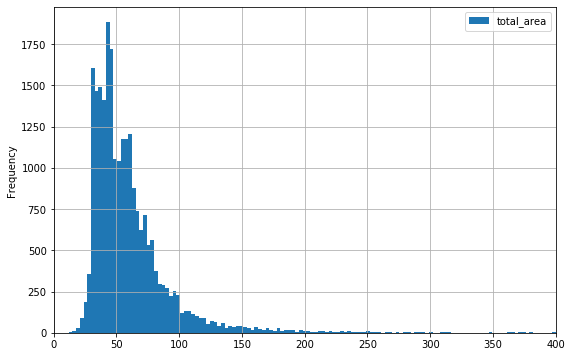

In [46]:
data.plot(y = 'total_area', 
          kind= 'hist',
          bins=300,
          xlim= (0,400),
          grid= True,
          figsize= (9,6))

На гистограмме видно 3 пика. Первый, около 28 м2, скорее всего это самые маленькие "однушки". Второй пик – примерно 48 м2, скорее всего это уже средние двухкомнатные квартиры. И третий пик около 60 м2 - трехкомнатные. 

##### Цена квартиры

In [47]:
#для удобства переведем рубли в тысячи рублей 
data['last_price'] = data['last_price'] / 1000

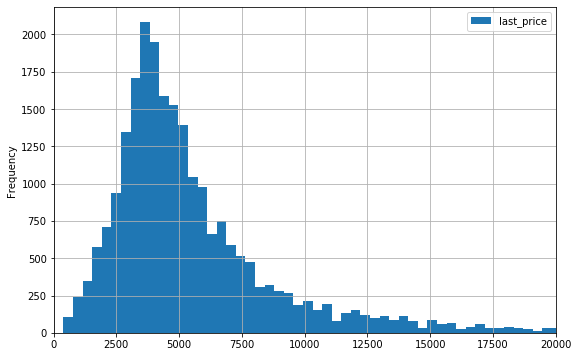

In [48]:
data.plot(y= 'last_price', 
          kind= 'hist',
          bins= 2000,
          xlim= (0, 20000),
          grid= True,
          figsize= (9, 6))

Пик значений около 3.2 млн. рублей. Можно сказать что распределение стремится к нормальному, с длинным хвостом справа. 

##### Количество комнат

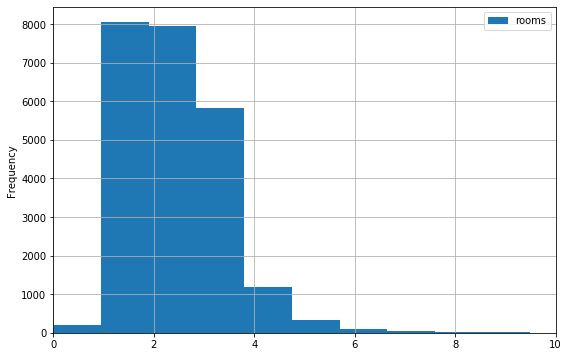

In [49]:
data.plot(y= 'rooms', 
          kind= 'hist',
          bins= 20,
          xlim= (0, 10),
          grid= True,
          figsize= (9, 6))

На гистограмме видно, что самое большое количество квартир 1- и 2-х комнатные. Также видим что в данных есть несколько аномальных нулевых значений.

##### Высота потолков

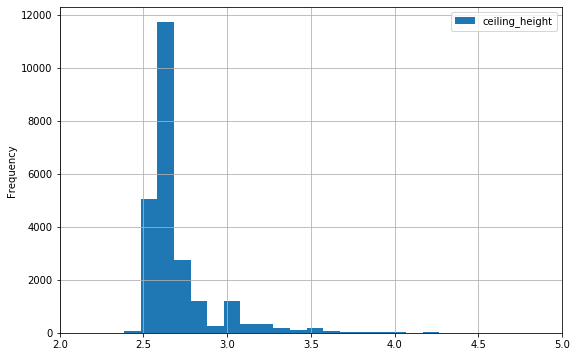

In [50]:
data.plot(y= 'ceiling_height', 
          kind= 'hist',
          bins= 1000,
          xlim= (2, 5),
          grid= True,
          figsize= (9, 6))

Видим пик на медианном значении (2.6 м), при этом помним о том, что пропущенные значения мы заполняли именно им (их было 38% от общего числа).
Сейчас стало видно, что график изменился довольно сильно по сравению с [изначальным](#ceiling0). Пока неизвестно как это повлияет на дальнейший анализ, будем с этой величиной особенно внимательны. 

#### 4.2. Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

In [51]:
#отфильтруем данные по закрытым сделкам
closed_deals = data.query('days_exposition != "open"')

In [52]:
closed_deals['days_exposition'] = closed_deals['days_exposition'].astype('int')
closed_deals['days_exposition'].describe()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


count    20518.0000
mean       180.8886
std        219.7280
min          1.0000
25%         45.0000
50%         95.0000
75%        232.0000
max       1580.0000
Name: days_exposition, dtype: float64

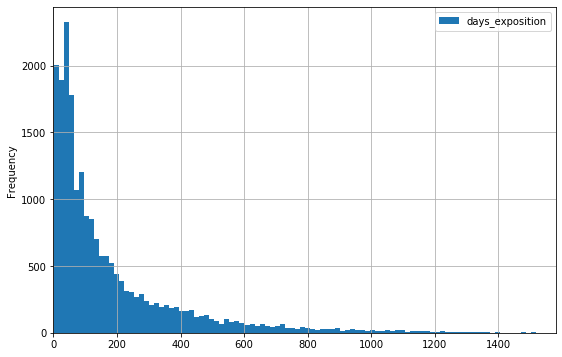

In [53]:
closed_deals.plot(y= 'days_exposition', 
          kind= 'hist',
          bins= 100,
          xlim= (0, 1580),
          grid= True,
          figsize= (9, 6))

Видим пик около 0, приблизим разрешение

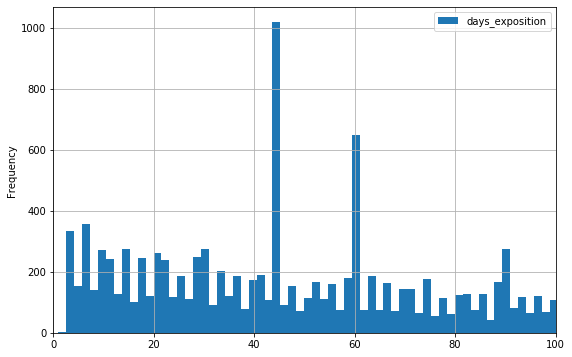

In [54]:
closed_deals.plot(y= 'days_exposition', 
          kind= 'hist',
          bins= 1000,
          xlim= (0, 100),
          grid= True,
          figsize= (9, 6))

При приближении становится видно что пика как такового нет, аномальных значений около нуля нет. Распределение близко к Пуассоновскому. Можно наблюдать интересный пик на значении 45 и 60 дней. Возможно на этом сроке сервис автоматически закрывает определенный тип объявлений (например, неинтересные или плохо заполненные). 

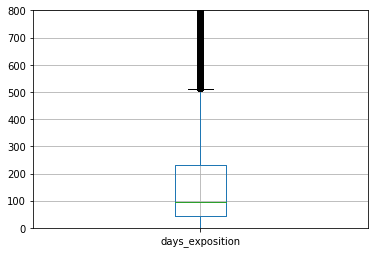

In [55]:
closed_deals.boxplot(column=['days_exposition'])
plt.ylim(0, 800)
plt.show()

Медианное значение 95 дней – половина объявлений закрывается за этот срок. 
Можно считать, что продажи прошли быстро, если квартира продана за 45 дней. Необычно долгие продажи начинаются от 232 и могут продолжаться аж до 1580 дней.

#### 4.3. Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

In [56]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,m2_price,exposition_weekday,exposition_month,exposition_year,living_to_total,kitchen_to_total
count,23699.0000,23699.0000,23699.0000,23699.0000,23699.0000,23699.0000,23699.0000,23699.0000,23699.0000,23699.0000,18157.0000,18180.0000,18181.0000,8079.0000,18181.0000,9110.0000,2.3699e+04,23699.0000,23699.0000,23699.0000,23699.0000,23699.0000
mean,9.8585,6541.5488,60.3487,2.0706,2.7244,10.6766,34.5685,5.8924,11.8233,0.5911,28793.6722,14191.2778,0.6114,490.8046,0.7703,517.9809,9.9422e+04,2.5693,6.4001,2017.3671,0.5641,0.2097
std,5.6825,10887.0133,35.6541,1.0784,0.9883,6.5950,22.2845,4.8852,8.9610,0.9593,12630.8806,8608.3862,0.8021,342.3180,0.9383,277.7206,5.0307e+04,1.7891,3.4916,1.0398,0.1034,0.1029
min,0.0000,12.1900,12.0000,0.0000,1.0000,1.0000,2.0000,1.0000,0.0000,0.0000,0.0000,181.0000,0.0000,1.0000,0.0000,13.0000,1.1183e+02,0.0000,1.0000,2014.0000,0.0216,0.0000
25%,6.0000,3400.0000,40.0000,1.0000,2.6000,5.0000,18.7000,2.0000,7.2000,0.0000,18585.0000,9238.0000,0.0000,288.0000,0.0000,294.0000,7.6585e+04,1.0000,3.0000,2017.0000,0.4913,0.1366
50%,9.0000,4650.0000,52.0000,2.0000,2.6500,9.0000,30.0000,4.0000,9.8000,0.0000,26726.0000,13098.5000,0.0000,455.0000,1.0000,502.0000,9.5000e+04,3.0000,6.0000,2017.0000,0.5678,0.1818
75%,14.0000,6800.0000,69.9000,3.0000,2.7000,16.0000,42.3458,8.0000,13.0000,1.0000,37273.0000,16293.0000,1.0000,612.0000,1.0000,729.0000,1.1426e+05,4.0000,10.0000,2018.0000,0.6350,0.2564
max,50.0000,763000.0000,900.0000,19.0000,100.0000,60.0000,409.7000,33.0000,270.3759,5.0000,84869.0000,65968.0000,3.0000,3190.0000,3.0000,1344.0000,1.9075e+06,6.0000,12.0000,2019.0000,1.0000,0.9130


Обратим внимание на столбцы:
`last_price, total_area, rooms, ceiling_height`. 

Помним о том, что цена у нас сейчас в тысячах рублей. 
Согласно данным, самая дешевая квартира была продана за 12 т.р, а самая дорогая – за 763 000 000 рублей.

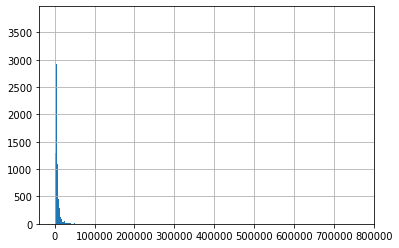

In [57]:
data['last_price'].hist(bins=1000)

Скорее всего, очень дорогие сделки являются не продажами квартир, а сделками с большими загородными домами, поэтому примем верхнюю границу в 50 млн. рублей - больше этого значения квартиры стоят редко.

Теперь рассмотрим нижнюю границу – 12 т.р. явно слишком мало за целую квартиру.

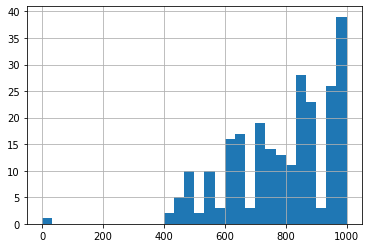

In [58]:
data = data.query('last_price < 50000')

data['last_price'].hist(bins=30, range=(0, 1000))

Видим выпадающее значение около 0. Вторая корзина начинается около 400 т.р. – это уже больше похоже на реальное значение, например столько может стоить однушка в небольшом городе и посёлке.

In [59]:
data = data.query('last_price >= 400')

##### total_area

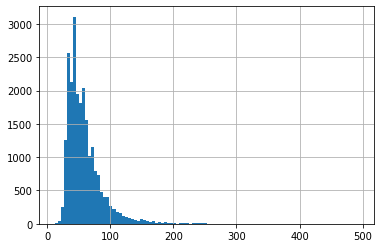

In [60]:
data['total_area'].hist(bins=100)

Здесь опять мы видим длинный хвост справа, который, вероятно появляется из-за продаж загородных домов. Установим верхнюю границу в 250 м2.

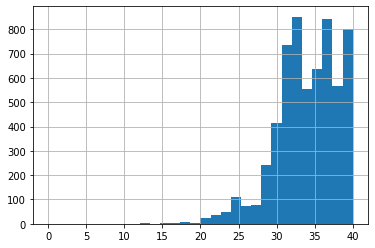

In [61]:
data = data.query('total_area < 250')

data['total_area'].hist(bins=30, range=(0, 40))

Изучив реальные предложения на сайтах объявлений, действительно можно найти квартиры от 10 м2, однако такие маленькие значения у нас очень редки и их можно убрать для того, чтобы в дальнейшем система проверяла подобные значения – вполне может быть, что комнаты выдаются за целые квартиры. Поэтому установим нижний порог в 20 м2.

In [62]:
data = data.query('total_area >= 20')

##### rooms

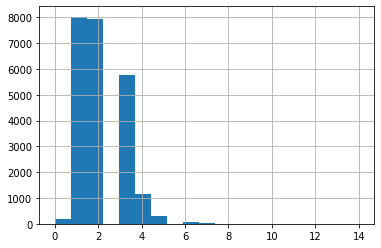

In [63]:
data['rooms'].hist(bins=19)

In [64]:
#проверим что значения 3 есть в датасете
data[data['rooms'] == 3]['rooms'].count()

5776

In [65]:
# проверим где возникают 0
data[(data['rooms'] == 0) &
    (data['studio'] == False) &
    (data['open_plan'] == False)
    ].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,m2_price,exposition_weekday,exposition_month,exposition_year,floor_category,living_to_total,kitchen_to_total


Таким образом значения 0 возникают когда продается либо студия, либо квартира с открытой планировкой. По техническим документам это однокомнатная квартира, поэтому такие значения можно заменить на 1.

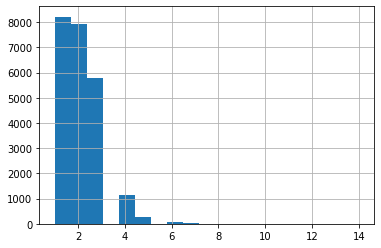

In [66]:
data.loc[data['rooms'] == 0] = 1

data['rooms'].hist(bins=19)

Что касается больших значений – установим верхнюю границу в 7 комнат, т.к. значения больше скорее всего у загородных домов.

In [67]:
data = data.query('rooms <= 7')

##### ceiling_height

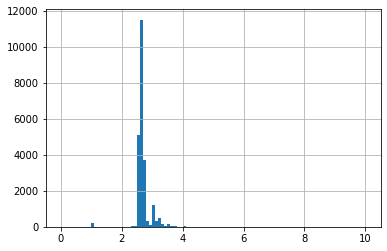

In [68]:
data['ceiling_height'].hist(bins=100, range=(0,10))

Ограничим значения высоты потолков 2мя метрами снизу и 5ю метрами сверху. 

In [69]:
data = data.query('2 < ceiling_height < 5')

#### 4.4. Какие факторы больше всего влияют на стоимость квартиры?

In [70]:
price_corr = data.corr().last_price.sort_values()
price_corr

cityCenters_nearest   -0.3370
ponds_nearest         -0.1100
kitchen_to_total      -0.0813
exposition_year       -0.0442
airports_nearest      -0.0383
exposition_weekday    -0.0165
exposition_month       0.0062
parks_nearest          0.0101
living_to_total        0.0167
balcony                0.0380
floors_total           0.0515
floor                  0.0617
total_images           0.1506
parks_around3000       0.2008
ponds_around3000       0.2066
ceiling_height         0.4178
rooms                  0.4863
kitchen_area           0.5028
living_area            0.6725
m2_price               0.7122
total_area             0.7771
last_price             1.0000
Name: last_price, dtype: float64

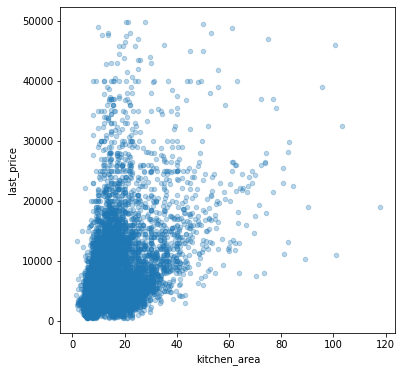

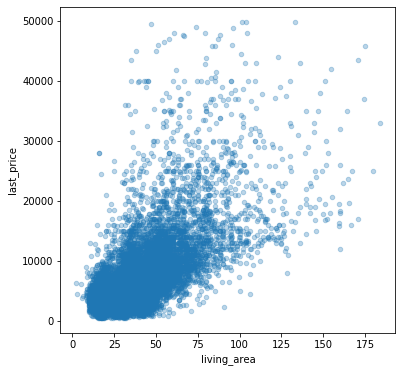

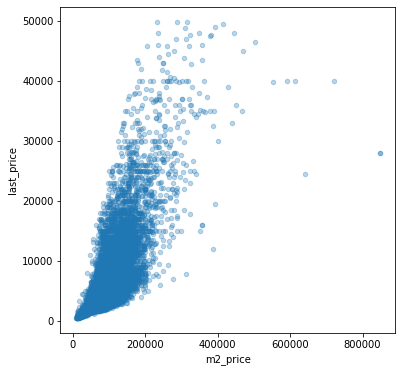

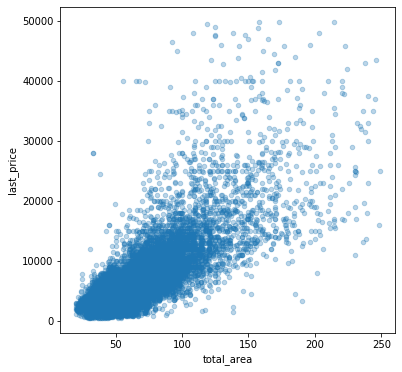

In [71]:
#построим графики для факторов, где коэф. корр. > 0.5
for index in price_corr.index:
    if  1 > price_corr[index] > 0.5:
        data.plot(y = 'last_price', 
                    x = index,
                    kind='scatter',
                    figsize=(6, 6),
                    alpha=0.3
                    )

Ярко выраженной линейной зависимости ни на одном из графиков нет, однако можно сказать что цена продажи наиболее сильно зависит от общей площади квартиры (коэффициент корреляции 0.78).  

Высокая корреляция с ценой за м2 частично объясняется тем, что мы считали это значение на основе цены.

Также отметим корреляцию факторов`kitchen_area` (0.50) и `living_area` (0.67).

Теперь рассмотрим зависимость от числа комнат.

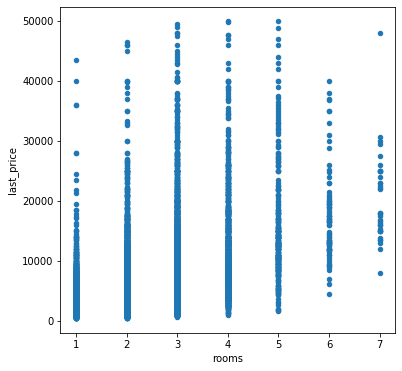

In [72]:
data.plot(y = 'last_price', 
          x = 'rooms',
          kind='scatter',
          figsize=(6, 6),
          )

Видим также положительно направленную зависимость – чем больше комнат, тем больше может быть цена за квартиру.

Удаленность от центра

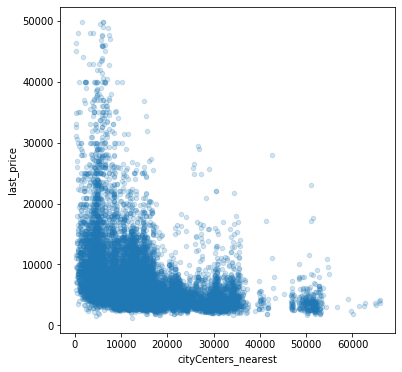

In [73]:
data.plot(y = 'last_price', 
          x = 'cityCenters_nearest',
          kind='scatter',
          figsize=(6, 6),
          alpha=0.2
          )

На графике видно что линейной зависимости нет – график стремится к гиперболе. Самые дорогие квартиры чаще всего встречаются в городе/пригороде (до 20км от центра).

#### Зависимость цены от того, на каком этаже расположена квартира

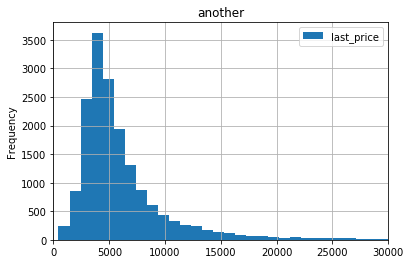

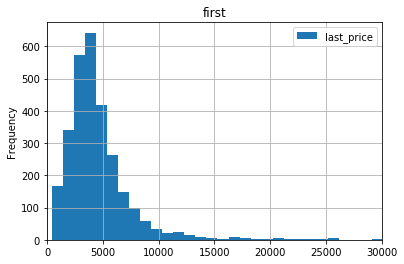

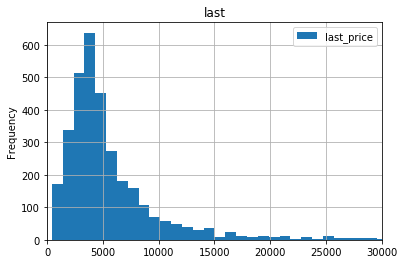

In [74]:
for name, group_data in data.groupby('floor_category'):
    group_data.plot(y = 'last_price', 
                  kind='hist',
                  xlim=(0, 30000),  
                  title= name,
                  bins= 50,
                  grid= True
                  )

На графиках видно, что цены для первого и последнего этажа особо не отличаются, а вот у "остальных" частота значений слева от пика уменьшилась, что значит такие квартиры в среднем дороже.

#### Зависимость от даты размещения:

##### Дня недели

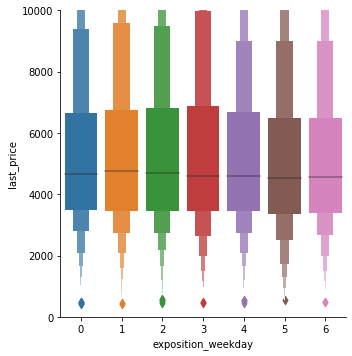

In [75]:
sns.catplot(x="exposition_weekday", y="last_price", kind="boxen", data=data).set(ylim=(0, 10000))

На графике видно, что самая высокая (медианная) цена наблюдается в понедельник (день 1), а самая низкая – в субботу.

##### Месяца

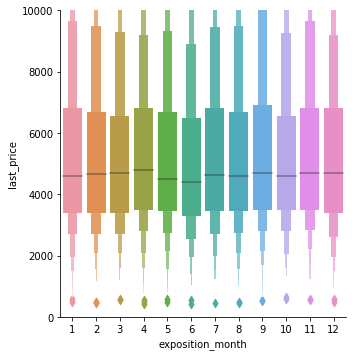

In [76]:
sns.catplot(x="exposition_month", y="last_price", kind="boxen", data=data).set(ylim=(0, 10000))

Судя по графику, самая высокая цена на квартиры в апреле, а самая низкая – в июне.

##### Года

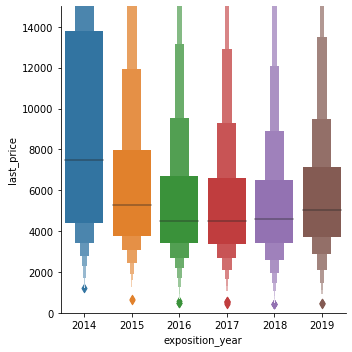

In [77]:
sns.catplot(x="exposition_year", y="last_price", kind="boxen", data=data).set(ylim=(0, 15000))

Фиксируем что в 2014 году цена была самой высокой (медиана около 7.8 млн) и падала до 2017 года (4.4 млн). После этого цены начали медленно расти.

#### 4.5. Статистика для топ 10 населённых пунктов с наибольшим числом объявлений.

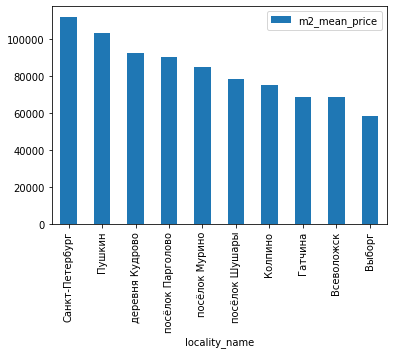

In [78]:
localities_pivot = data.pivot_table(index='locality_name', values='m2_price', aggfunc=['count', 'mean'])
localities_pivot.columns = ['count', 'm2_mean_price'] 

#получим список из 10
top_10_localities = localities_pivot.sort_values(by='count', ascending= False).head(10)

#упорядочим и построим график по средней цене за м2
(top_10_localities.sort_values(by='m2_mean_price', ascending= False)
                  .plot(y= 'm2_mean_price',
                        kind='bar'
                        )
)

На графике отображены 10 населённых пунктов с наибольшим числом объявлений. Самая высокая стоимость одного квадратного метра получилась в Санкт-Петербурге, а самая низкая – в Выборге.

#### 4.6. Санкт-Петербург. Как цена квартиры зависит от удалённости от центра.

In [79]:
# подсчет значений с нуля становится долгим, создадим возможность сохранять состояние

# dill.dump_session('2nd_project_env.db')

In [80]:
# dill.load_session('2nd_project_env.db')

In [81]:
#переводим расстояние в километры
data['cityCenters_nearest'] = data['cityCenters_nearest'] / 1000

#округляем значения
data['cityCenters_nearest'] = data['cityCenters_nearest'].round()

piter_data = data.query('locality_name == "Санкт-Петербург"')
piter_data.cityCenters_nearest.head()

0    16.0
2    14.0
4     8.0
7    12.0
9    15.0
Name: cityCenters_nearest, dtype: float64

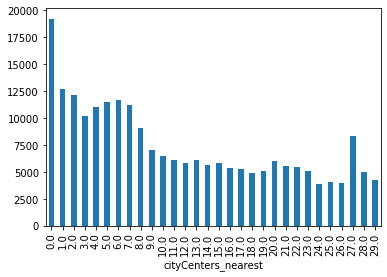

In [82]:
#средняя цена для каждого километра и её график
(piter_data.groupby('cityCenters_nearest')['last_price']
            .mean()
            .plot(y= 'cityCenters_nearest',
                  kind='bar')
)

In [92]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'm2_price', 'exposition_weekday',
       'exposition_month', 'exposition_year', 'floor_category',
       'living_to_total', 'kitchen_to_total'],
      dtype='object')

На графике видно, что самая высокая цена на квартиры в диаметре 1 км от самого центра. После этого средняя цена падает до значения 3 км, после чего начинает расти. Второе падение можно наблюдать около значения 8 км. Скорее всего, цены немного падают когда мы отходим от самого центра, и немного возрастают когда мы подходим к границе центра. Поэтому примем за границу центра всё до значения в 8 км.

#### 4.7. Анализ сегмента квартир в центре Санкт-Петербурга.

Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

In [95]:
center_piter_data = piter_data.query('cityCenters_nearest < 8')
#отобразим интересующие нас значения для центра
center_piter_data.loc[:, ['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,3322.0000,3322.0000,3322.0000,3322.0000
mean,84.7943,11426.2553,2.7282,2.9244
std,39.4868,7702.2351,1.2401,0.3434
min,20.0000,1600.0000,1.0000,2.4000
25%,56.0000,6590.0000,2.0000,2.6500
50%,76.3000,8950.0000,3.0000,2.8000
75%,104.0000,13287.5000,3.0000,3.1000
max,249.0000,49900.0000,7.0000,4.8000


In [84]:
#отобразим интересующие нас значения для всего города
piter_data.loc[:, ['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,15369.0000,15369.0000,15369.0000,15369.0000
mean,62.3040,7174.1426,2.1456,2.7173
std,30.1973,5230.1734,1.0419,0.2320
min,20.0000,1200.0000,1.0000,2.3000
25%,42.0000,4200.0000,1.0000,2.6000
50%,55.0000,5500.0000,2.0000,2.6500
75%,73.9000,8000.0000,3.0000,2.7500
max,249.0000,49900.0000,7.0000,4.8000


Сравнивая данные по двум таблицам, можно видеть что: в центре медианные значения и площади и цены больше чем в целом по городу.
Это очень интересно, так как это противоречит стереотипу о том, что обычно квартиры в центре маленькие и дорогие. Согласно нашей статистике они и дороже и больше чем все квартиры в городе Санкт-Петербург.

Что касается комнат, то здесь опять стереотип не работает – медианное значение для центра 3 комнаты, для всего города - 2.
Про высоту потолков с уверенностью сказать нельзя. Так как мы заполняли большое количество пропущенных данных медианным значением – при увеличении размера выборки её медиана будет стремиться к общей по всем данным. 

In [85]:
center_piter_data.corr().last_price.sort_values()

ponds_nearest         -0.0668
kitchen_to_total      -0.0514
parks_nearest         -0.0373
exposition_year       -0.0331
cityCenters_nearest   -0.0276
exposition_weekday    -0.0181
exposition_month      -0.0138
living_to_total       -0.0043
ponds_around3000       0.0654
floors_total           0.1096
parks_around3000       0.1353
balcony                0.1438
airports_nearest       0.1467
floor                  0.1483
total_images           0.1636
ceiling_height         0.1686
rooms                  0.4060
kitchen_area           0.4521
living_area            0.5791
m2_price               0.6584
total_area             0.6968
last_price             1.0000
Name: last_price, dtype: float64

Здесь ситуация схожа с общей по всем данным - видим тот же набор коррелирующих факторов `living_area (0.58), m2_price (0.65), total_area (0.70)`. Немного уменьшилась корреляция с площадью кухни и стала меньше 0.5.

### Шаг 5. Общий вывод<a id='step5'></a>

**1.** Мы обработали и проанализировали информацию о 23699 объявлениях с 22-я возможными признаками. В процессе работы были решены следующие проблемы:<br>

**2.** Было выполнено заполнение пропусков. <br>

**Высота потолков** была заполнена медианным значением. Возможной причиной возникновения пропусков является незнание высоты потолков людьми, выставляющими квартиру на продажу.

Количество **этажей в здании** было заполнено на основе архитектуры городов России и информации о этаже квартиры.

Доля пропусков для **жилой площади** квартир была 8%. Для восстановления пропущеных значений была построена модель линейной регрессии по факторам, имеющим сильную корреляцию с жил. площадью – общая площадь и количество комнат.
Пропущенные значения скорее всего опять возникают из-за того, что владельцы просто не знают значений жилой площади.

**Аппартаменты**<br>
Природа пропущенных значений до конца не ясна. Cкорее всего этот пункт – "радио" кнопка на сайте, и нажать её не должно быть сложно. Однако мы видим что доля пропущенных значений целых 88.3 процентов. Либо люди сомневаются в значении слова "аппартаменты" и не выбирают ничего, либо есть проблемы в дизайне сайта и люди просто не видят эту кнопку - это необходимо проверить.  
Мы приняли предположение о том, что кнопку видно и люди просто не знают что это за тип жилья. А раз не знают, то, скорее всего у них обычная квартира. Поэтому пропущенные значения были заменены на False.

Чтобы восстановить данные о **площади кухни** мы использовали формулу Площадь кухни = Общая площадь - Жилая площадь. 

Для **количества балконов** мы использовали следующую логику: если человек не указал число балконов — скорее всего, их нет. Такие пропуски были заменены на 0.

Далее у нас идут значения, которые заполняются автоматически, на основе геолокации. Это locality_name    airports_nearest    cityCenters_nearest. Их мы восстановить никак не можем, их можно заменять на `unknown`, но, для удобства дальнейшего анализа, на данном этапе мы этого делать не стали.
Судя по данным, здесь пропуски возникают в тех случаях, когда квартиры расположены в поселках, деревнях, а иногда и, возможно, вне мест совместного обитания человека. Для таких мест просто нету достаточной информации у геолокационных сервисов.

Сколько дней было размещено объявление. <br>
Зафиксировали что данные имеют тип float, так как у нас не было нулевых значений, скорее всего `NaN` – были открытыми объявлениями. Им мы присвоили статус `open`.

Произведено приведение данных к нужным типам.  <br>
Столбец `first_day_exposition` был привден к формату `datetime`, мы получили точность временного значения до дней.

**3.** Мы посчитали и добавили в таблицу:
- цену квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры; варианты — первый, последний, другой;
- соотношение жилой и общей площади, а также отношение площади кухни к общей.

**4.** Проведен исследовательский анализ данных.  
<br>
**4.1.** Мы изучили: площадь, цену, число комнат, высоту потолков. Построили гистограммы для каждого параметра.

**Общая площадь**
На гистограмме выявлено 3 пика. Первый, около 28 м2, соответствовал однокомнатным квартирам, второй пик – примерно 48 м2,  двухкомнатным квартирам, и третий пик около 60 м2 - трехкомнатным.

**Цена квартиры**
Пиковове значение около 3.2 млн. рублей. Можно сказать что распределение стремится к нормальному, с длинным хвостом справа.

**Количество комнат**
На гистограмме было видно, что самое большое количество квартир 1- и 2-х комнатные. Также видим что в данных есть несколько аномальных нулевых значений.

Для **высоты потолков** пик находился на медианном значении (2.6 м), при этом помним о том, что пропущенные значения мы заполняли именно им (их было 38% от общего числа). 

**4.2.** Далее мы изучили время продажи квартиры. Распределение оказалось близко к Пуассоновскому. Можно наблюдать интересный пик на значениях 45 и 60 дней. Возможно на этом сроке сервис автоматически закрывает определенный тип объявлений (например, неинтересные или плохо заполненные).

Медианное значение 95 дней – половина объявлений закрывается за этот срок. Можно считать, что продажи прошли быстро, если квартира продана за 45 дней. Необычно долгие продажи начинаются от 232 и могут продолжаться аж до 1580 дней.

**4.3.** Редкие и выбивающиеся значения были убраны. 
Необходимо было обработать столбцы: `last_price, total_area, rooms, ceiling_height`.

`last_price`
Согласно данным, самая дешевая квартира была продана за 12 т.р, а самая дорогая – за 763 000 000 рублей.
После анализа данных за верхнее значение было принято 50 млн. рублей, а за нижнее – 400 т.р. 

`total_area`
Здесь опять мы видим длинный хвост справа, который, вероятно появляется из-за продаж загородных домов. Установим верхнюю границу в 250 м2, нижний порог в 20 м2.

`rooms`
Было обнаружено, что значения 0 возникают когда продается либо студия, либо квартира с открытой планировкой. По техническим документам это однокомнатная квартира, поэтому такие значения мы заменяли на 1.
Что касается больших значений – была установлена верхняя граница в 7 комнат.

`ceiling_height`
Ограничили значения высоты потолков 2мя метрами снизу и 5ю метрами сверху.

**4.4.** Какие факторы больше всего влияют на стоимость квартиры?

* Ярко выраженной линейной зависимости не было найдено, однако можно сказать, что цена продажи наиболее сильно зависит от общей площади квартиры (коэффициент корреляции 0.78).  

* Высокая корреляция с ценой за м2 частично объясняется тем, что мы считали это значение на основе цены.
* Также отметим корреляцию факторов`kitchen_area` (0.50) и `living_area` (0.67).

* Зависимость от числа комнат:
    Видим положительно направленную зависимость – чем больше комнат, тем больше может быть цена за квартиру.

* Удаленность от центра: 
    линейной зависимости нет – график стремится к гиперболе. Самые дорогие квартиры чаще всего встречаются в городе/пригороде (до 20км от центра).

* Зависимость цены от того, на каком этаже расположена квартира: 
    На графиках видно, что цены для первого и последнего этажа особо не отличаются, а вот у "остальных" частота значений слева от пика уменьшилась, что значит такие квартиры в среднем дороже.

**Зависимость от даты размещения:**
- Для дня недели было найдено что самая высокая (медианная) цена наблюдается в понедельник (день 1), а самая низкая – в субботу.
- Судя по месячному графику, самая высокая цена на квартиры в апреле, а самая низкая – в июне.
- Мы отметили, что в 2014 году цена была самой высокой (медиана около 7.8 млн) и падала до 2017 года (4.4 млн). После этого цены начали медленно расти.

**4.5.** Статистика для топ 10 населённых пунктов с наибольшим числом объявлений.
Мы получили список из топ 10 населённых пунктов с наибольшим числом объявлений, после этого его упорядочли и построили график по средней цене за м2.

Самая высокая стоимость одного квадратного метра получилась в Санкт-Петербурге, а самая низкая – в Выборге.

**4.6.** Санкт-Петербург. Как цена квартиры зависит от удалённости от центра.
Анализ показал, что самая высокая цена на квартиры в диаметре 1 км от самого центра. После этого средняя цена падает до значения 3 км, после чего начинает расти. Второе падение можно наблюдать около значения 8 км. Скорее всего, цены немного падают когда мы отходим от самого центра, и немного возрастают когда мы подходим к границе центра. Поэтому мы приняли за границу центра всё до значения в 8 км.

**4.7.** Анализ сегмента квартир в центре Санкт-Петербурга.  
Был проанализирован сегмента квартир в центре Санкт-Петербурга, изучены следующие параметры: площадь, цена, число комнат, высота потолков. Было проведено сравнение с общими выводами по всему городу.

Сравнивая данные можно видеть, что: в центре медианные значения и площади и цены больше чем в целом по городу.
Это очень интересно, так как это противоречит стереотипу о том, что обычно квартиры в центре маленькие и дорогие. Согласно нашей статистике, они и дороже, и больше, чем все квартиры в городе Санкт-Петербург.

Что касается комнат, то здесь опять стереотип не работает – медианное значение для центра 3 комнаты, для всего города - 2.
Про высоту потолков с уверенностью сказать нельзя. Так как мы заполняли большое количество пропущенных данных медианным значением – при увеличении размера выборки её медиана будет стремиться к общей по всем данным. 

Также мы выделили факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).
Здесь ситуация оказалась схожа с общей по всем данным - мы наблюдали тот же набор коррелирующих факторов living_area (0.58), m2_price (0.65), total_area (0.70). Немного уменьшилась корреляция с площадью кухни и стала меньше 0.5.
</br>